In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) =  datasets.cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
# y_train is a 2D array; hence we are reshaping it
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [30]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

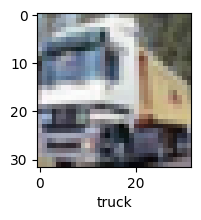

In [31]:
plot_sample(X_train, y_train, 1)

In [32]:
# Normalising
X_train = X_train / 255
X_test = X_test / 255

In [34]:
# Using from previous tut: GPU wala
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train,y_train,epochs = 1)


1563/1563 [==============================] - 93s 59ms/step - loss: 1.8118 - accuracy: 0.3548


In [35]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.7769 - accuracy: 0.3823


[1.7768830060958862, 0.3822999894618988]

In [ ]:
# Classification report
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report \n", classification_report(y_test, y_pred_classes))

# Using CNN

In [37]:
cnn = models.Sequential([
    
    # cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(), #we are in the middle layer, no need to specify the shape, model will figure it out
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [39]:
cnn.fit(X_train, y_train, epochs = 1)

1563/1563 [==============================] - 39s 24ms/step - loss: 1.4651 - accuracy: 0.4711


In [40]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.2298 - accuracy: 0.5647


[1.2298375368118286, 0.5647000074386597]

In [42]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

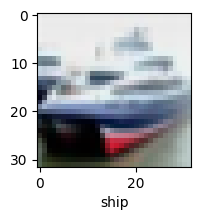

In [43]:
plot_sample(X_test,y_test,1)

In [44]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 8ms/step


array([[1.27590531e-02, 1.41226000e-03, 4.60744426e-02, 5.84405601e-01,
        1.60886366e-02, 1.99197114e-01, 1.12058304e-01, 3.32172937e-03,
        2.07158439e-02, 3.96699784e-03],
       [5.07917181e-02, 5.67988098e-01, 4.68892831e-04, 4.78812763e-05,
        1.07856758e-04, 1.90984315e-06, 3.92126167e-05, 3.30497096e-06,
        2.56777018e-01, 1.23774134e-01],
       [7.72200450e-02, 4.89807725e-01, 6.05920935e-03, 4.62646876e-03,
        1.31313305e-03, 5.39972098e-04, 1.28229114e-03, 6.17069600e-04,
        1.83157563e-01, 2.35376418e-01],
       [3.23508829e-01, 7.38308430e-02, 1.31074227e-02, 2.10568728e-03,
        2.18642689e-03, 1.32360292e-04, 1.99175277e-03, 1.02863502e-04,
        5.51567256e-01, 3.14665586e-02],
       [9.64695588e-04, 1.35184475e-03, 4.45114151e-02, 1.92593098e-01,
        1.98845327e-01, 1.08073488e-01, 4.41873968e-01, 7.93429464e-03,
        2.01959372e-03, 1.83229486e-03]], dtype=float32)

In [45]:
# argmax gives the index of the maximum element
np.argmax([1,2,3,4,5])

4

In [46]:
np.argmax(y_pred[0])

3

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 8, 6]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

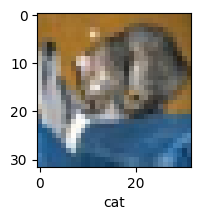

In [54]:
plot_sample(X_test, y_test , 0)

In [55]:
classes[y_classes[0]]

'cat'

In [56]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.55      0.61      1000
           1       0.74      0.60      0.66      1000
           2       0.57      0.24      0.34      1000
           3       0.40      0.41      0.40      1000
           4       0.54      0.40      0.46      1000
           5       0.46      0.57      0.50      1000
           6       0.53      0.83      0.65      1000
           7       0.71      0.60      0.65      1000
           8       0.72      0.63      0.68      1000
           9       0.48      0.83      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.59      0.56      0.56     10000
weighted avg       0.59      0.56      0.56     10000

